In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set_style("darkgrid")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [5]:
data = pd.read_csv("Train.csv")

print("Rows and Columns:", data.shape)
data.head()

Rows and Columns: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [15]:
# Drop ID column
data = data.drop("ID", axis=1)

# Separate target
target_column = "Reached.on.Time_Y.N"

X = data.drop(target_column, axis=1)
y = data[target_column]

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (10999, 10)
Target Shape: (10999,)


In [16]:
num_features = X.select_dtypes(include=["int64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
Categorical Features: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [22]:
num = Pipeline(steps=[
    ("num_imputer", SimpleImputer(strategy="mean")),
    ("std_scaling", StandardScaler())
])

In [24]:
cat = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ("numerical_part", num, num_features),
    ("categorical_part", cat, cat_features)
])

In [27]:
X_processed = preprocessor.fit_transform(X)

print("Processed Shape:", X_processed.shape)

Processed Shape: (10999, 19)


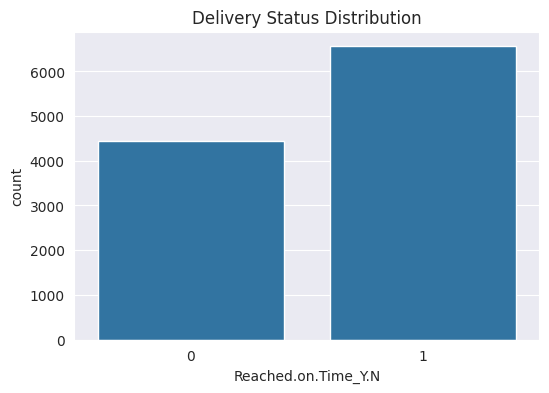

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Delivery Status Distribution")
plt.show()